# Iteration 1: Decision tree model

## Modules

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
sklearn.set_config(transform_output='pandas')

## Import data

In [3]:
raw_df = pd.read_csv('../data/housing_iteration_0_2_classification/housing_iteration_0_2_classification.csv')
raw_df

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
0,8450,65.0,856,3,0,0,2,0,0,0
1,9600,80.0,1262,3,1,0,2,298,0,0
2,11250,68.0,920,3,1,0,2,0,0,0
3,9550,60.0,756,3,1,0,3,0,0,0
4,14260,84.0,1145,4,1,0,3,192,0,0
...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0,0
1456,13175,85.0,1542,3,2,0,2,349,0,0
1457,9042,66.0,1152,4,2,0,1,0,0,1
1458,9717,68.0,1078,2,0,0,1,366,0,0


Split off labels:

In [4]:
X = raw_df.copy()
y = X.pop('Expensive')

Split into training vs. test set:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
len(X_train), len(X_test), len(y_train), len(y_test)

(1314, 146, 1314, 146)

In [6]:
X_train.describe()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
count,1314.000000,1075.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000
mean,10497.645358,69.963721,1054.282344,2.871385,0.608828,3.065449,1.776256,93.688737,15.188737
std,9886.148758,24.239102,443.676452,0.819258,0.640674,42.341109,0.741655,125.433013,55.574526
min,1300.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7579.750000,60.000000,794.250000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,9423.000000,69.000000,992.000000,3.000000,1.000000,0.000000,2.000000,0.000000,0.000000
75%,11604.500000,80.000000,1297.750000,3.000000,1.000000,0.000000,2.000000,168.000000,0.000000
max,215245.000000,313.000000,6110.000000,8.000000,3.000000,738.000000,4.000000,857.000000,440.000000


_LotFrontage_ has some missing rows.

## Approach: Decision tree model

### Impute missing data

In [7]:
imputer = SimpleImputer(strategy='median')
imputer.fit(X=X_train)
X_train_imp = imputer.transform(X=X_train)
X_train_imp.describe()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
count,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000
mean,10497.645358,69.788432,1054.282344,2.871385,0.608828,3.065449,1.776256,93.688737,15.188737
std,9886.148758,21.925464,443.676452,0.819258,0.640674,42.341109,0.741655,125.433013,55.574526
min,1300.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7579.750000,60.000000,794.250000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,9423.000000,69.000000,992.000000,3.000000,1.000000,0.000000,2.000000,0.000000,0.000000
75%,11604.500000,78.000000,1297.750000,3.000000,1.000000,0.000000,2.000000,168.000000,0.000000
max,215245.000000,313.000000,6110.000000,8.000000,3.000000,738.000000,4.000000,857.000000,440.000000


In [60]:
max_depth = 1
pipes = []
accuracy = []
while True:
  imputer = SimpleImputer(strategy='mean')
  model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=5)
  pipe = make_pipeline(imputer, model)
  pipe.fit(X=X_train, y=y_train)
  if model.get_depth() != max_depth:
    break
  pipes.append(pipe)
  accuracy.append((
    max_depth,
    accuracy_score(y_true=y_train, y_pred=pipe.predict(X_train)),
    accuracy_score(y_true=y_test, y_pred=pipe.predict(X_test)),
  ))
  max_depth += 1

accuracy

[(1, 0.8987823439878234, 0.9178082191780822),
 (2, 0.9140030441400304, 0.9246575342465754),
 (3, 0.9246575342465754, 0.9315068493150684),
 (4, 0.9315068493150684, 0.9315068493150684),
 (5, 0.9345509893455098, 0.9315068493150684),
 (6, 0.9383561643835616, 0.9246575342465754),
 (7, 0.9429223744292238, 0.9178082191780822),
 (8, 0.9444444444444444, 0.9178082191780822),
 (9, 0.9459665144596652, 0.9178082191780822),
 (10, 0.9459665144596652, 0.910958904109589)]

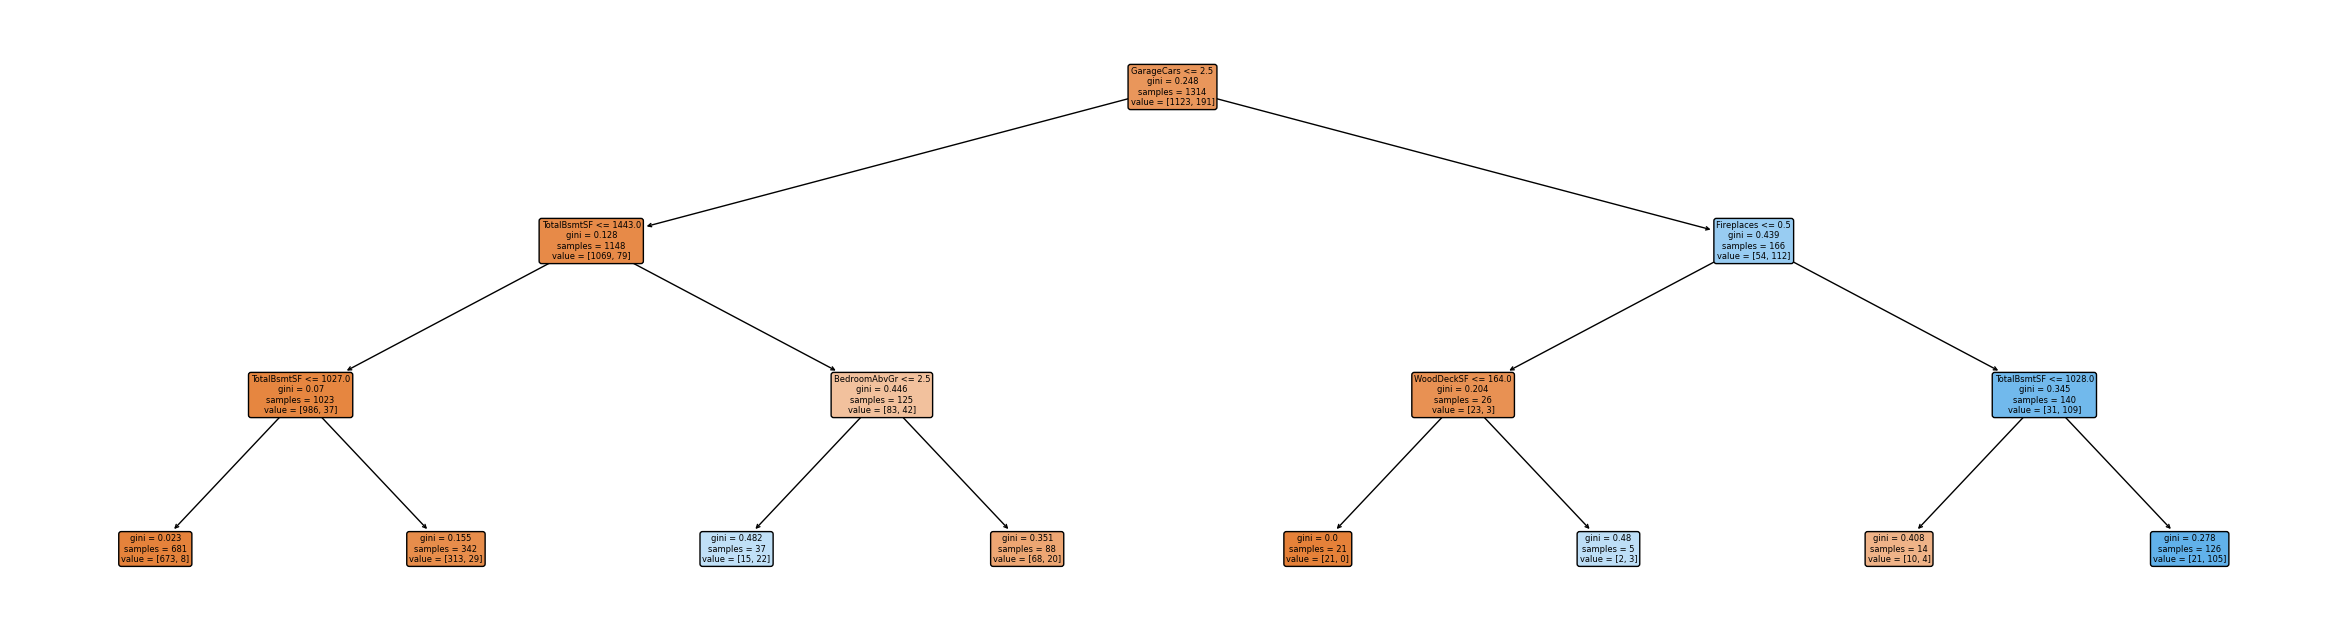

In [65]:
depth = 3
plt.figure(figsize=(30, 8))
plot_tree(
  pipes[depth-1][1],
  fontsize=6,
  feature_names=X.columns,
  filled=True,
  rounded=True
  )
plt.show()


## Final scores

On training set:

In [69]:
accuracy_score(
  y_pred=pipes[depth-1].predict(X_train),
  y_true=y_train)

0.9246575342465754

On test set:

In [70]:
accuracy_score(
  y_pred=pipes[depth-1].predict(X_test),
  y_true=y_test)

0.9315068493150684

On complete set:

In [71]:
accuracy_score(
  y_pred=pipes[depth-1].predict(X),
  y_true=y)

0.9253424657534246